# All About Regressions

| Case &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| Method &nbsp; &nbsp; &nbsp;| x_continue &nbsp; &nbsp; &nbsp;| x_binary &nbsp; &nbsp; &nbsp; | y &nbsp; &nbsp; &nbsp;|
| --- | --- | --- | --- | --- |
| 1 | ymean | not used | not used | keep |
| 2A | OLS | keep | keep | keep |
| 2B | OLS | keep | keep | de-mean |
| 2C | OLS | std. | std. | de-mean |
| 3A | Ridge | keep | keep | keep |
| 3B | Ridge | std. | keep | de-mean |
| 3C | Ridge | keep | keep | de-mean |
| 3D | Ridge | std. | std. | de-mean |
| 4 | Lasso | std. | keep | de-mean |

Each case use a different model and data preprocessing procedures. The "ymean" method in Case 1 simply uses the mean of  y  in the training data to do prediction. Cases 2A to 2C use OLS to train and predict. They are different in terms of how we preprocess feature values and outcome values. For example, Case 2C standardize all features (continuous-valued or binary) and use de-meaned y to train and predict outcome values. Cases 3A to 2D adopt Ridge regression and Case 4 adopts the Lasso regression. A constant term should be included in OLS, Ridge and Lasso regressions.

You are allowed to use learning models in sklearn.linear_model in this homework.

In [1]:
import pandas as pd
train_data = pd.read_csv("df1_train.csv")
train_data.head()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,...,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,...,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,...,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,...,0,0,0,1,0,0,0,0,0,0


### Q1
Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.

In [2]:
summary = train_data.describe()
summary

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<br>
The y value in this dataset, which is life_post_consumer, variates a lot with the min value being 17 and the max value being 11328. The large range of values can also be observed on other continuous variables in the dataset. Most of the continuous variables have **high standard deviation** relative to their mean.
<br>

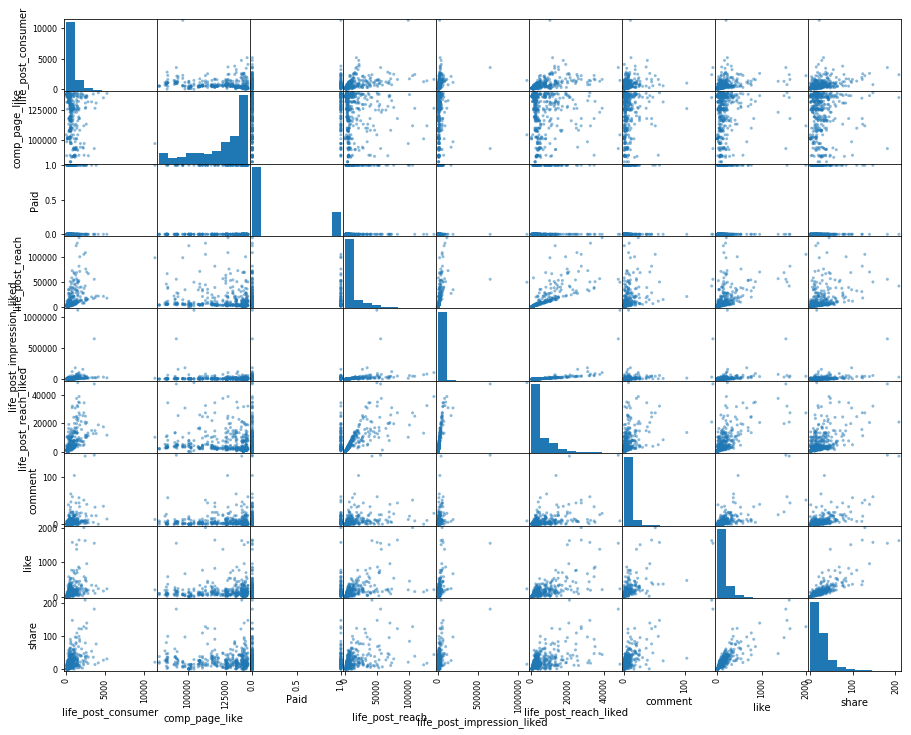

In [8]:
from pandas.plotting import scatter_matrix
attributes = ['life_post_consumer','comp_page_like','Paid','life_post_reach','life_post_impression_liked','life_post_reach_liked','comment','like','share']
_ = scatter_matrix(train_data[attributes], figsize=(15,12))

### Q3 (Case 2A) (10%)
Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [4]:
import statsmodels.api as sm

y_variable_name = 'life_post_consumer'
x_feature_names = list(train_data.columns.values)
x_feature_names.remove(y_variable_name)

statmodel = sm.OLS(train_data[y_variable_name], sm.tools.add_constant(train_data[x_feature_names])).fit()
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     life_post_consumer   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     9.584
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           4.58e-38
Time:                        17:43:08   Log-Likelihood:                -3133.8
No. Observations:                 400   AIC:                             6356.
Df Residuals:                     356   BIC:                             6531.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9664.9713   3376.237      2.863      0.004    3025.096    1.63e+04
comp_page_like                -0.0684      0.024     -2.841      0.005      -0.116      -0.021
Paid                         147.0597     77.810      1.890      0.060      -5.964     300.084
life_post_reach                0.0179      0.003      6.568      0.000       0.013       0.023
life_post_impression_liked    -0.0002      0.001     -0.298      0.766      -0.002       0.001
life_post_reach_liked          0.0048      0.010      0.466      0.642      -0.016       0.025
comment                        6.8214      3.351      2.035      0.043       0.230      13.413
like                          -0.6168      0.318     -1.940      0.053      -1.242       0.008
share                          7.5428      2.607      2.894      0.004       2.416      12.669
type_link                   -621.0500    184.192     -3.372      0.001    -983.290    -258.810
type_status                 1368.4888    146.323      9.353      0.000    1080.723    1656.255
type_video                    49.7452    280.314      0.177      0.859    -501.533     601.024
cat2                        -138.2624    105.575     -1.310      0.191    -345.891      69.366
cat3                        -126.6455     98.183     -1.290      0.198    -319.736      66.445
month1                     -3291.4947   1298.802     -2.534      0.012   -5845.784    -737.205
month2                     -2511.9752   1144.473     -2.195      0.029   -4762.754    -261.197
month3                     -2255.6194    957.911     -2.355      0.019   -4139.496    -371.743
month4                     -2018.9619    710.473     -2.842      0.005   -3416.213    -621.711
month5                     -1462.6993    538.144     -2.718      0.007   -2521.041    -404.357
month6                      -819.8254    367.689     -2.230      0.026   -1542.941     -96.710
month7                      -627.3824    277.139     -2.264      0.024   -1172.418     -82.347
month8                      -492.6017    233.868     -2.106      0.036    -952.539     -32.665
month9                      -248.6596    202.314     -1.229      0.220    -646.540     149.221
month10                     -236.7942    162.424     -1.458      0.146    -556.225      82.636
month11                     -482.0112    161.102     -2.992      0.003    -798.843    -165.179
dow1                         152.3039    120.916      1.260      0.209     -85.495     390.103
dow2                        -173.7843    124.383     -1.397      0.163    -418.402      70.833
dow3                          30.7369    126.538      0.243      0.808    -218.118     279.592
dow4                        -195.5752    131.129     -1.491      0.137    -453.460      62.309
dow5                         -70.6704    12

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = train_data[x_feature_names]
y = train_data[y_variable_name]
model_2A = LinearRegression().fit(X, y)
model_2A

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
from sklearn.metrics import mean_squared_error

test_data_x = pd.read_csv("df1_test1.csv")
test_data_y = pd.read_csv("df1_test1y.csv")
predict_result_2A = []
for i in range(len(test_data_x)):
    predict_result_2A.append(model_2A.predict(test_data_x.loc[[i]])[0])
rmse_2A = mean_squared_error(test_data_y, predict_result_2A)
print("RMSE: {}".format(rmse_2A))
print(predict_result_2A[:20])

RMSE: 479264.23555391416
[781.5799150744788, 315.9204311193025, 2279.084852398838, -136.34286372775568, 302.35624062126226, 462.42402367611794, 321.67770824386935, 504.52244767236516, 505.89547103756377, 488.36700577997544, 392.614235193716, 388.9184670984396, 804.8752750890217, 634.3236443158748, 176.31765618376085, 645.7291380933693, 1983.53858871371, 3144.397100453918, 4060.610712195872, 4288.223081013327]


In [ ]:
reg1 = sm.OLS(endog=data['lpmeal'], exog=sm.tools.add_constant(data[["p_bla", "lwage", "lhouse", .... ]]))